In [50]:
# Etapa 1: Entendimiento de los datos

In [51]:
# En primera instancia, se importan las librerías necesarias para el análisis de los datos

In [52]:
import numpy as np

In [53]:
import pandas as pd

In [54]:
import matplotlib.pyplot as plt 

In [55]:
import sklearn as sk

# estaba presentando problemas para importacion de librerias , asi que  dicidi importar una a una ,encontrando errores ,  Reinicie terminal  es instale  libreria por libreria ,  tuve alguno problemas con (base), pero desactive con ' conda deactivate' y dando kill terminal y pude instalar 

In [56]:
import sklearn.datasets as skd

In [57]:
import seaborn as sns

# Ahora procedo a la carga del dataframe para iniciar  su analisis 


In [58]:
file_path = '/Users/m1pro/Documents/inteligencia artificial/Repositorio/Miguel-Saavedra/data/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Verifico que se cargaron los datos mostrando las primeras filas del DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Nuestra Data tien  7043 resgistro  o dilas  y 21 atributos o columnas  , es  decir tiene  7043 entreadas  cada una con 21 atributos 

In [59]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = df.shape
shape

(7043, 21)

# Nuestro dataframe contien atributos en numeros enteros, texto y numeros decimales 

In [60]:
#Cual es el tipo de los atributos?
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
#Medida de centralidad y desviación para atributos numéricos:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


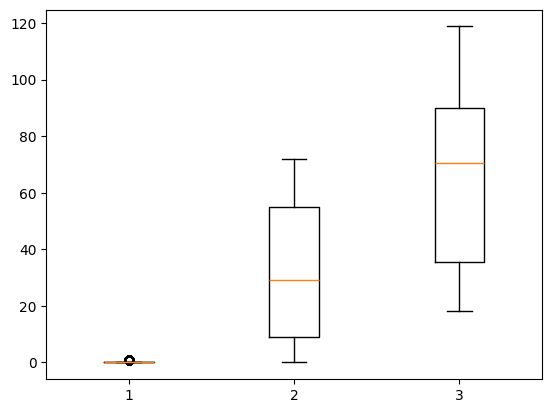

In [62]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((df['SeniorCitizen'],df['tenure'],df['MonthlyCharges']))
plt.show()

In [63]:
# En el anterior grafico se observa que no hay datos atípicos en las variables SeniorCitizen, tenure y MonthlyCharges, sin embargo me llama la atención que la variable Senior tiene datos atípicos, por lo que se procede a realizar un análisis más detallado de esta variable.

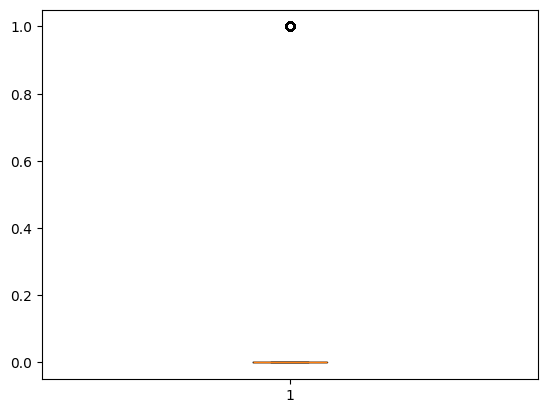

In [64]:
plt.boxplot((df['SeniorCitizen']))
plt.show()

# Hay un dato atipico , que valdria la pena investigar 

In [65]:
#Medida de centralidad para atributos categóricos: En este caso se utilizó la moda para determinar la medida de centralidad de los atributos categóricos. es facilitada por que encuentra los elementos que más se repiten en la columna.asi no sean numericos
df.mode()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Male,0.0,No,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
1,0003-MKNFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,NaN
2,0004-TLHLJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-IGKFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-EXCHZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,9992-RRAMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,9992-UJOEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,9993-LHIEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# resepecto a la moda, El hecho de que NaN aparezca en múltiples filas para las mismas columnas puede sugerir un patrón de datos faltantes, quizás debido a un error en la recolección de datos, problemas en la fuente de datos, o que estas respuestas eran opcionales y no todos los clientes proporcionaron esta información.

In [66]:
correlation_matrix = df.corr(numeric_only=True)


# la correlacion solo es posible entre variables numericas, hice limpieza de columnas no numericas  , donde se puede ver una poca relacion entres  las variables 

In [67]:
print(correlation_matrix)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


In [ ]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.

#  Al tratar de enconetrar dastos faltantes , da  0 ,  osea que no  hay variables  sin datos  

In [68]:
max(df.isnull().sum(axis=1))

0

# como es de eseprar el resultados  es  "0" 

In [69]:
#Cuantos datos faltantes hay por cada atributo?
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# En los siguientes dos ejempllo podemos ver Cuantos registros hay por cada clase,  es decir, por cada valor del atributo de salida.  en el primero , podemos decir que  senior son 1142 clientes  , en es segundo  3641 no eran partner

In [74]:
print(df['SeniorCitizen'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [75]:
print(df['Partner'].value_counts())

Partner
No     3641
Yes    3402
Name: count, dtype: int64
